In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import scipy as sp
from scipy.optimize import curve_fit

$\bf{1.)}$ In the next cell, I use the radius-metallicity relation (assuming a standard deviation of .15 dex) to find the odds that a terrestrial planet will both form and avoid destruction by Hot Jupiters

In [27]:
r = np.linspace(3,20,1000)*u.kpc
Z_dec_rate = -.04 # slope of metallicity gradient
num = 100 # number of trials
Z_std_dev = .15 # standard dev in dex
sample_Z = np.zeros((num,1000))
P_ef = np.zeros((num,1000))
P_hj = np.zeros((num,1000))
for n in range(0,num):
    Z = np.array([Z_dec_rate*i/u.kpc+.26 for i in r])
    temp_err_Z = np.array([np.random.normal(i,Z_std_dev)-i for i in Z])
    sample_Z[n] = Z + temp_err_Z
    for i in range(0,1000):
        if sample_Z[n][i] > -.6:
            P_ef[n][i] = .4
        else:
            P_ef[n][i] = 0
        P_hj[n][i] = .03*10**(2.0*sample_Z[n][i])
P_ef_avg = []
P_hj_avg = []
for i in range(0,1000):
    P_ef_avg.append(np.average([P_ef[n][i] for n in range(0,num)]))
    P_hj_avg.append(np.average([P_hj[n][i] for n in range(0,num)]))

$\bf{2.)}$ Next, I display these results graphically. $P_\text{terrestrial formation}, P_\text{Hot Jupiter formation}, \text{and }P_\text{terrestrial survival} = P_\text{tf}\times(1-P_\text{hjf})$ as functions of galactic radius from 3 to 20 kpc

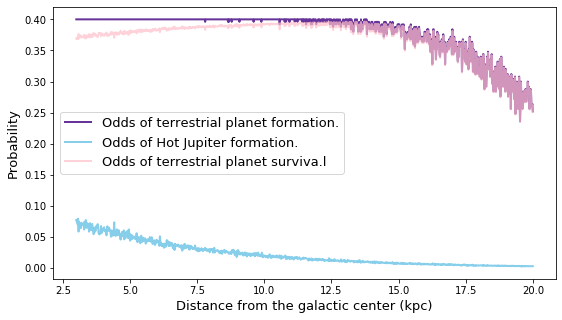

In [119]:
P_es_avg = P_ef_avg*(np.ones(1000) - P_hj_avg)
plt.figure(figsize=(9, 5))

plt.plot(r, P_ef_avg, label = "Odds of terrestrial planet formation.", color='rebeccapurple', linewidth='2')
plt.plot(r, P_hj_avg, label = "Odds of Hot Jupiter formation.", color='skyblue', linewidth='2')
plt.plot(r, P_es_avg, label = "Odds of terrestrial planet surviva.l", color='pink', alpha=0.7, linewidth='2')

plt.xlabel("Distance from the galactic center (kpc)", fontname='Times New Roman', fontsize=13)
plt.ylabel("Probability", fontname='Times New Roman', fontsize=13)

plt.legend(loc='best', prop={'size': 13});



$\bf{3.)}$ Taking a step back, a graphical representation of these probabilities as function of metallicity (between -.6 and .6 dex) instead of radius:

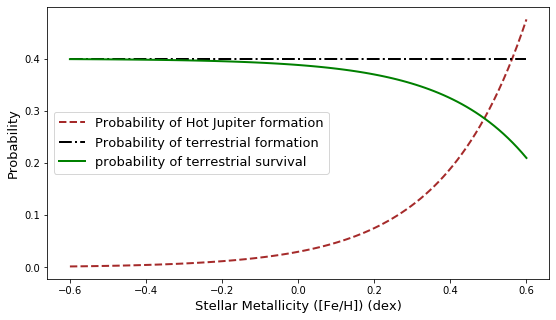

In [117]:
z = np.linspace(-.6,.6,100)
plt.figure(figsize=(9, 5))

plt.plot(z,[.03*10**(2.0*(i)) for i in z], label='Probability of Hot Jupiter formation', color='brown', linestyle='--',
        linewidth='2')
plt.plot(z,np.ones(100)*.4, label = 'Probability of terrestrial formation', color='black', linestyle='-.', linewidth='2')
plt.plot(z,np.ones(100)*.4*(np.ones(100)-[.03*10**(2.0*(i)) for i in z]), label = 'probability of terrestrial survival',
         color='green', linestyle='-', linewidth='2')

plt.xlabel('Stellar Metallicity ([Fe/H]) (dex)', fontname='Times New Roman', fontsize=13)
plt.ylabel("Probability", fontname='Times New Roman', fontsize=13)
plt.legend(loc = 'best', prop={'size': 13});
# plt.savefig("planetary formation rates")

$\bf{4.)}$ In the next few cells, I do math related to calculating the SNe rate and SNe lethality. Nothing here is important to understand at this phase.

In [5]:
R_center = [4,6,8,10,12,14]
Z_midplane = [.08,.011,.01,-.11,-.21,-.31]

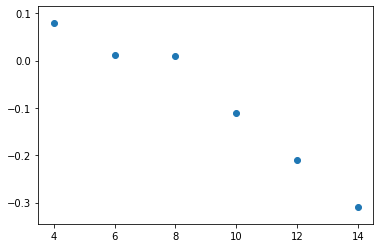

In [6]:
def linfit(x,m,b):
    return m*x+b
    

plt.scatter(R_center,Z_midplane)
fitpars, error = curve_fit(linfit,R_center,Z_midplane)

In [7]:
10/7*((.08)**.7-(.015)**.7)-10/3*((.5)**-.3-(.08)**-.3)-10/23*((100)**-1.3-(.5)**-1.3)

4.245278015206356

(1, 4)

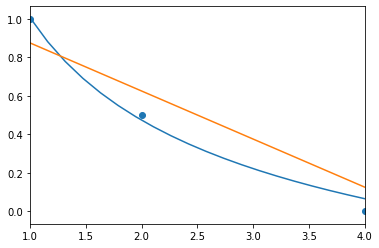

In [9]:
def ratio(x,a,c,d):
    return a/(x)**c+d
def linfit(x,m,b):
    return m*x+b
x = np.linspace(1,3.999,20)


sn_flux = [1,2,4,5]
surv_odds = [1,1/2,0,0]
plt.scatter(sn_flux,surv_odds)
fitpars_curve, error_curve = curve_fit(ratio,sn_flux,surv_odds)
fitpars_lin, error_lin = curve_fit(linfit,sn_flux,surv_odds)
plt.plot(x,ratio(x, *fitpars_curve))
plt.plot(x,linfit(x,*fitpars_lin))
plt.xlim(1,4)


In [10]:
fitpars_lin

array([-0.25 ,  1.125])

$\bf{5.)}$ Equations to be used in The Paper:
$$\sigma_{SNe}(R) = \frac{(0.040-0.0043R)}{pc^2 Gyr}
$$ 

$$P_\text{surv} =    \left\{
\begin{array}{ll}
      1 & \sigma_\text{norm}\leq 1 \\
      \frac{2.28}{\sigma_\text{norm}^{0.38}}-1.27 & 1\leq \sigma_\text{norm}\leq 5 \\
      0 & 5\leq \sigma_\text{norm} \\
\end{array} 
\right.
$$

$$P_\text{surv} = -\frac{\sigma_\text{norm}}{4}+\frac{9}{8} $$

$\bf{6.)}$ Here I use similar methods as in $\bf{1}$ applied to supernova survivability. Basically, I create 1000 different sets of data assuming normal distributions from the mean SN rate and then figure out how many of those trials would be uninhabitable for each radius.

In [11]:
r = np.linspace(3,20,1000)*u.kpc
Z_dec_rate = -.04
num = 100
sample_SN_rate = np.array(np.zeros((num,1000)))
P_surv_SN = np.zeros((num,1000))
# P_ef = np.zeros((num,1000))
# P_hj = np.zeros((num,1000))
for n in range(0,num):
    SN_rate = np.array([.04-.0043*i/u.kpc for i in r])
    temp_err_SN_rate = np.array([np.random.normal(i,.005)-i for i in SN_rate])
    sample_SN_rate[n] = SN_rate + temp_err_SN_rate
    sample_SN_rate[n] = sample_SN_rate[n] / .01356
    P_surv_SN[n] = -sample_SN_rate[n] / 4 + (9/8)*np.ones(1000)
    for i in range(0,1000):
        if P_surv_SN[n][i] < 0:
            P_surv_SN[n][i] = 0
        elif P_surv_SN[n][i] > 1:
            P_surv_SN[n][i] = 1
        
        
P_surv_SN_avg = []
for i in range(0,1000):
    P_surv_SN_avg.append(np.average([P_surv_SN[n][i] for n in range(0,num)]))

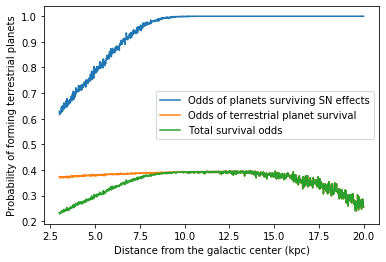

In [12]:
# plt.figure(figsize=(50,50))
plt.plot(r,P_surv_SN_avg, label = "Odds of planets surviving SN effects")
# plt.plot(r,P_ef_avg, label = "Odds of terrestrial planet formation")
# plt.plot(r,P_hj_avg, label = "Odds of Hot Jupiter formation")
P_es_avg = P_ef_avg*(np.ones(1000)-P_hj_avg)
plt.plot(r,P_es_avg, label = "Odds of terrestrial planet survival")
P_total = P_es_avg*P_surv_SN_avg
plt.plot(r,P_total, label = "Total survival odds")
plt.xlabel("Distance from the galactic center (kpc)")
plt.ylabel("Probability of forming terrestrial planets")
plt.legend()
plt.savefig("Galactic Survival Rate")